#CREDIT CARD FRAUD DETECTION

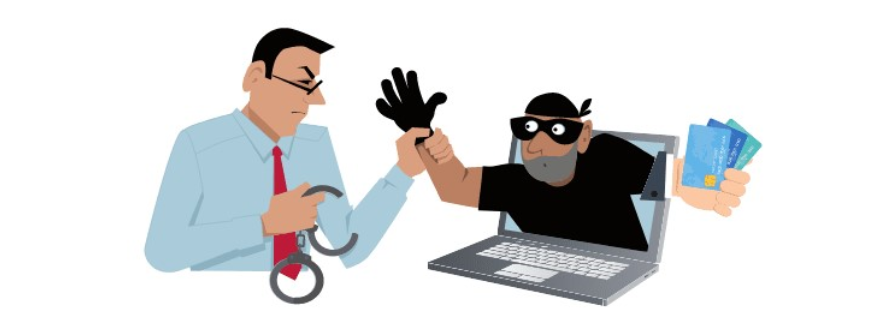

Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, fbeta_score, f1_score, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df_data = pd.read_csv("/content/creditcard.csv")

In [ ]:
df_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# print info
print('Data shape:', df_data.shape)
print('Labels, Label count:', np.unique(df_data['Class'], return_counts=True))
print()

Data shape: (284807, 31)
Labels, Label count: (array([0, 1]), array([284315,    492]))



<ipython-input-149-77637ead645a>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


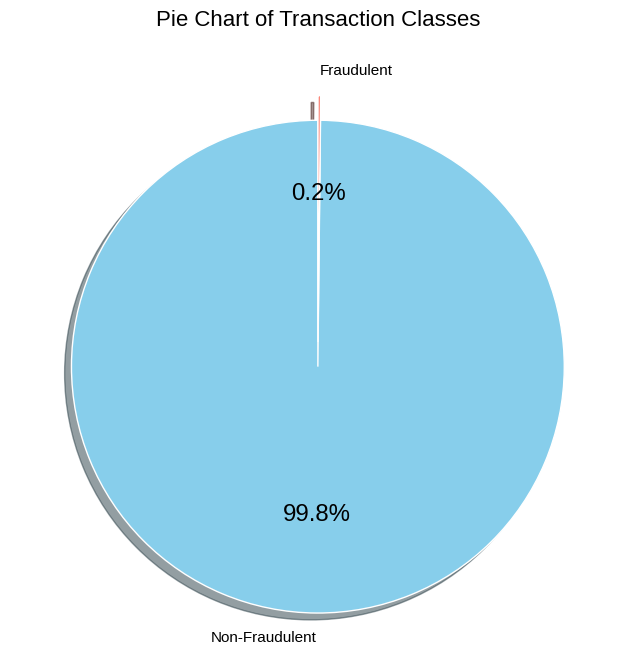

In [ ]:
#Class Distribution

class_counts = df_data['Class'].value_counts()
#style
plt.style.use('seaborn-whitegrid')

#pie chart
fig, ax = plt.subplots(figsize=(8, 8))
colors = ['skyblue', 'salmon']
explode = (0.1, 0)
wedges, texts, autotexts = ax.pie(class_counts, labels=['Non-Fraudulent', 'Fraudulent'], autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True, textprops=dict(color="black"))

for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_size('x-large')
ax.set_title('Pie Chart of Transaction Classes', color='black', fontsize=16)
plt.show()

The class distribution is highly skeewed.
We have 99.8% of Non-Fraudulent and 0.2% of Fraudulent transactions.

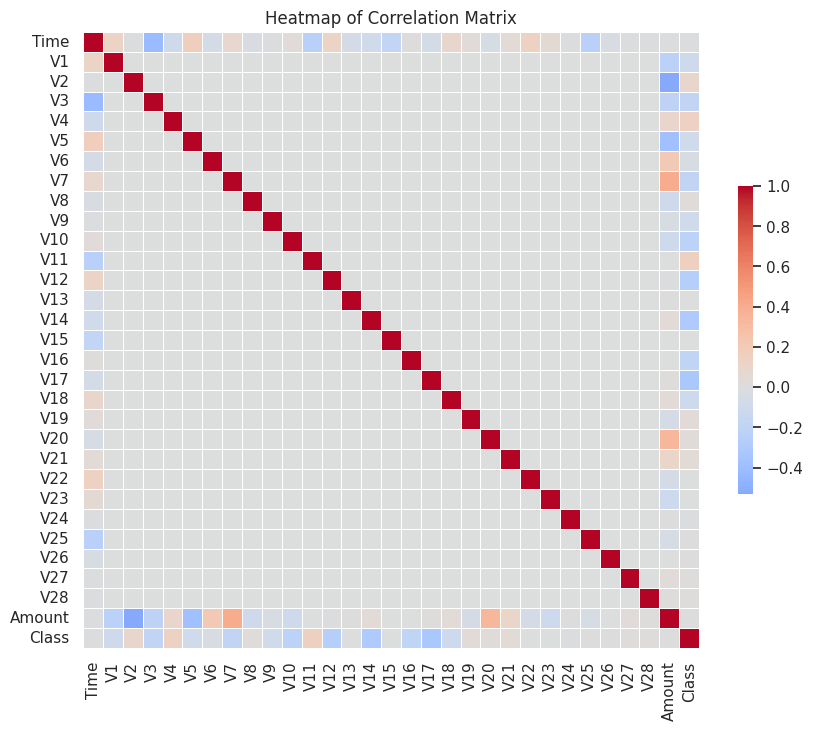

In [ ]:
#correlation matrix
corr = df_data.corr()

#style
sns.set(style="white")
plt.figure(figsize=(10, 8))

#heatmap
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap of Correlation Matrix')
plt.show()

There is very less colinearity or we can say there is no colinearilty between the variables

In [ ]:
# data partition using sklearn
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# separation into data (X) and respective labels (y)
X, y = df_data.iloc[:, 1:-1].values, df_data.iloc[:, -1].values  #Dropping Time because it has no effect on the output
print('First 2 samples:', X[:2])
print('First 2 labels:', y[:2])
print()

# split configuration
test_size = 0.3 # data percentage going to test
random_seed = 0 # save the seed for reproducibility

# data split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                   random_state=random_seed,
                   test_size=test_size,
                   stratify=y)

# train info
print('Train data shape:', X_train.shape)
print('Train data labels, label count:', np.unique(y_train, return_counts=True))
print()

First 2 samples: [[-1.35980713e+00 -7.27811733e-02  2.53634674e+00  1.37815522e+00
  -3.38320770e-01  4.62387778e-01  2.39598554e-01  9.86979013e-02
   3.63786970e-01  9.07941720e-02 -5.51599533e-01 -6.17800856e-01
  -9.91389847e-01 -3.11169354e-01  1.46817697e+00 -4.70400525e-01
   2.07971242e-01  2.57905802e-02  4.03992960e-01  2.51412098e-01
  -1.83067779e-02  2.77837576e-01 -1.10473910e-01  6.69280749e-02
   1.28539358e-01 -1.89114844e-01  1.33558377e-01 -2.10530535e-02
   1.49620000e+02]
 [ 1.19185711e+00  2.66150712e-01  1.66480113e-01  4.48154078e-01
   6.00176493e-02 -8.23608088e-02 -7.88029833e-02  8.51016549e-02
  -2.55425128e-01 -1.66974414e-01  1.61272666e+00  1.06523531e+00
   4.89095016e-01 -1.43772296e-01  6.35558093e-01  4.63917041e-01
  -1.14804663e-01 -1.83361270e-01 -1.45783041e-01 -6.90831352e-02
  -2.25775248e-01 -6.38671953e-01  1.01288021e-01 -3.39846476e-01
   1.67170404e-01  1.25894532e-01 -8.98309914e-03  1.47241692e-02
   2.69000000e+00]]
First 2 labels: [0 0

In [ ]:
# test info
print('Test data shape:', X_test.shape)
print('Test data labels, label count:', np.unique(y_test, return_counts=True))
print()

Test data shape: (85443, 29)
Test data labels, label count: (array([0, 1]), array([85295,   148]))



##Data Pre-processing

In [ ]:
# Data Normalisation
# sklearn implementation

# scaler object
scaler = StandardScaler()

# train data
X_train_norm = scaler.fit_transform(X_train) # use fit only on the train set!

df_X_train = pd.DataFrame(X_train_norm)
df_X_train.columns = list(df_data.columns[1:-1])

df_X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-4.269455,4.463420,-3.380758,-2.098445,-0.723928,-1.255387,0.327100,0.844811,4.818257,8.573201,...,4.635419,-0.758935,0.480569,0.480316,1.092612,2.199916,-0.023007,3.772621,2.022955,-0.353164
1,-0.658708,0.461250,-0.112247,-1.193937,1.456020,-0.542735,1.370859,-0.193244,-0.873800,-0.625073,...,0.073719,0.186554,0.537531,-1.075827,0.481464,2.737380,0.552416,0.129259,0.313236,-0.132306
2,-0.309824,0.141410,1.740207,-0.109342,-0.241759,-0.053969,0.142325,0.093597,0.619073,-0.631719,...,-0.167699,0.008433,0.364616,-0.063018,0.669450,-0.958056,0.254997,-0.115515,-0.264519,-0.309581
3,0.700920,-0.198798,0.536968,-0.128694,-0.789142,-0.706442,-0.447246,-0.293933,0.559673,0.074184,...,0.100255,-0.184502,0.022107,0.005583,1.178810,1.029158,-0.634912,-0.007671,0.038606,-0.315628
4,-1.095369,-4.583312,-3.257838,1.026322,-1.529655,-0.744970,2.983724,-1.095416,-1.306463,-0.019975,...,5.177760,1.729067,-1.184376,-3.346791,0.278477,-0.620257,1.614658,-1.374750,0.920490,8.876888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199359,-1.017535,1.046357,-0.732777,-1.889719,1.177603,2.298776,-0.343292,1.205583,0.860678,0.936270,...,1.001235,-0.413618,-0.978153,0.076208,1.664131,0.449674,1.595505,1.739300,1.070917,-0.296155
199360,-0.224892,0.641188,1.045424,-0.020182,0.029626,-0.683644,0.600415,-0.092406,-0.467701,-0.304952,...,0.204350,-0.294522,-0.735363,-0.037860,0.630630,-0.316380,0.145111,0.671751,0.372492,-0.345544
199361,0.422167,-1.596828,-2.089896,0.148915,-0.412362,-1.187635,1.325565,-0.782496,-1.201196,0.629954,...,1.152169,0.473373,0.002068,-1.183629,0.282622,0.475044,1.943675,-0.642025,0.113703,2.659940
199362,-0.777710,-3.789902,-1.744212,0.942005,-1.227412,1.479036,1.117355,0.067013,0.685559,-0.646136,...,4.260240,1.802558,0.000608,-2.157282,-2.491011,-2.273466,1.200636,-0.817407,0.694265,6.786241


In [ ]:
# test data
X_test_norm = scaler.transform(X_test) # don't use fit on the test set!

df_X_test = pd.DataFrame(X_test_norm)
df_X_test.columns = list(df_data.columns[1:-1])

df_X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.051506,0.401781,-0.340242,-0.477290,0.797975,-0.515962,0.721242,-0.082484,0.241274,-1.194182,...,-0.230254,0.153409,0.689599,-0.104369,0.921508,-0.995006,0.763275,0.199772,0.397263,-0.305549
1,-0.856440,0.750834,0.626136,-1.485875,-0.595589,-0.784794,0.119014,0.388838,-1.036135,0.779897,...,-0.319031,-0.522232,-0.803295,0.054034,0.797822,-0.075742,0.165105,1.212995,0.879519,-0.315628
2,-0.718574,-0.056722,0.804922,-1.332698,0.468496,-0.853093,0.441889,-0.250059,-1.521539,0.020665,...,-0.164731,0.399230,1.153637,-0.581471,0.258858,1.614022,-0.329789,-0.524169,0.312936,-0.235195
3,1.033065,-0.603562,-0.565570,-0.357545,-0.583012,-0.150173,-0.640862,0.025736,-0.325517,0.934306,...,-0.671073,-0.407330,-0.590771,0.474538,1.233651,-0.819208,1.039842,-0.128101,-0.146873,-0.153271
4,0.243210,-0.780348,0.387353,1.132676,-0.892531,0.086210,-0.146356,0.074010,0.859899,-0.190410,...,0.701300,0.405293,0.157586,-0.730830,-0.203205,0.732426,-0.507300,-0.033136,0.279285,1.176107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85438,-0.147842,0.678808,0.955513,0.316640,0.150051,-0.658271,0.589115,-0.165679,-0.751879,-0.528731,...,0.195896,-0.212654,-0.559506,-0.004041,0.632848,-1.018787,0.235843,0.308174,0.482095,-0.352357
85439,-0.380094,0.690015,0.735439,0.753918,-0.199596,-0.137941,0.118436,0.406207,-0.086357,-0.412062,...,0.058894,0.051940,0.471424,-0.291200,0.098860,0.023651,-0.492124,0.766885,0.428679,-0.308089
85440,1.024109,-0.008493,-0.567092,1.291812,0.137776,0.041150,-0.115412,-0.044551,-0.588896,1.133129,...,-0.168580,0.017389,0.288318,0.172672,-0.582335,-0.566001,4.868246,-0.489132,-0.301340,-0.340665
85441,0.550802,-0.094160,0.851128,0.826470,-0.674679,0.264303,-0.676702,0.334740,0.619683,0.023756,...,-0.319142,0.270673,0.982292,-0.046425,0.344515,0.661540,-0.523812,0.189770,0.061993,-0.355663


In [ ]:
# test info
print('Test data shape:', df_X_test.shape)
print('Test data labels, label count:', np.unique(y_test, return_counts=True))
print()

Test data shape: (85443, 29)
Test data labels, label count: (array([0, 1]), array([85295,   148]))



In [ ]:
# train info
print('Train data shape:', df_X_train.shape)
print('Train data labels, label count:', np.unique(y_train, return_counts=True))
print()

Train data shape: (199364, 29)
Train data labels, label count: (array([0, 1]), array([199020,    344]))



Number of Legitimate Transactions: 199020

Number of Fraud Transactions: 344

The dataset is highly imbalanced, this can lead to over-fitting & biased toward the majority class.We can make it balanced using Synthetic Minority Oversampling

(Reference : https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c )

###SMOTE

In [ ]:
sm = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(df_X_train, y_train)

df_X_train_res = pd.DataFrame(X_res)
df_X_train_res.columns = list(df_data.columns[1:-1])

# Train data Information
print('Train data shape:', df_X_train_res.shape)
print('Train data labels, label count:', np.unique(y_res, return_counts=True))
print()

Train data shape: (398040, 29)
Train data labels, label count: (array([0, 1]), array([199020, 199020]))



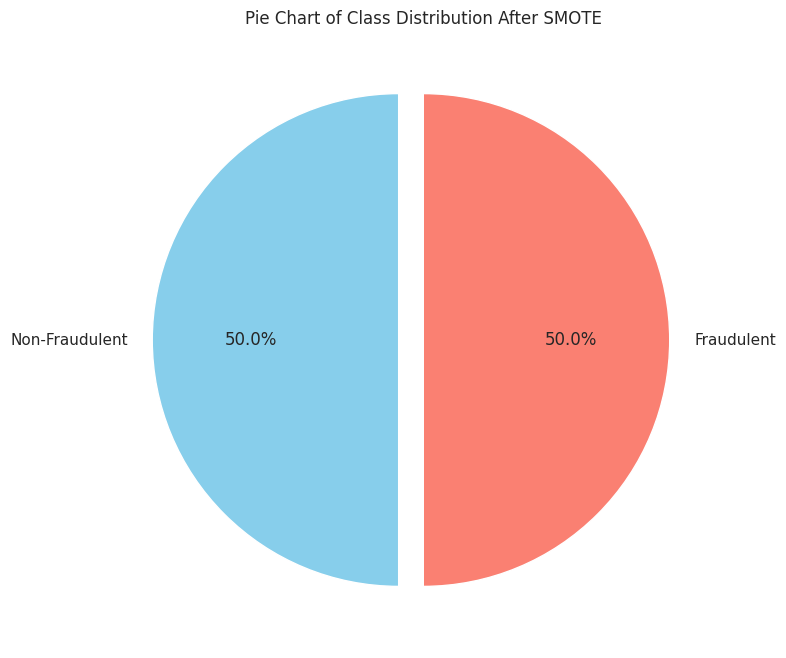

In [ ]:
#Class Distrubution after SMOTE

class_counts_after_smote = pd.Series(y_res).value_counts()

#pie chart
plt.figure(figsize=(8, 8))
colors = ['skyblue', 'salmon']
explode = (0.1, 0)
plt.pie(class_counts_after_smote, labels=['Non-Fraudulent', 'Fraudulent'], autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Pie Chart of Class Distribution After SMOTE')
plt.show()

In [ ]:
df_data.isna().sum()   # There are no null values in the dataset, so there is no need to handle it.

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

##Models : KNN , SVM , Decision Tree, Logistic Regression

### Support Vector Machine With SMOTE

Training with polynomial kernel of degree 3:

In [ ]:
# polynomial kernal of degree 3

# scikit learn implementation
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# SVM classifier configuration
phi = 'poly'   # polynomial SVM kernel
phi_degree = 3 # polynom degree

c = 1.0        # c hyper-param (weight of slack variables within soft margin)
               # small c, high bias, large regularization
               # large c, high variance, small regularization

# SVM training
svm = SVC(kernel=phi, degree=phi_degree, C=c)
svm.fit(df_X_train_res, y_res.ravel())

print('Model:', svm) # this is the model!

Model: SVC(kernel='poly')


In [ ]:
# svm test
predictions = svm.predict(df_X_test)
print('Predictions:', predictions)
print('Predictions\' shape:', predictions.shape)

Predictions: [0 0 0 ... 0 0 0]
Predictions' shape: (85443,)


Metric Collection

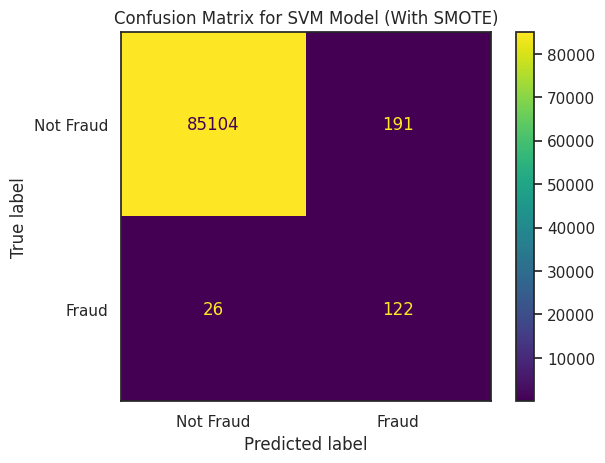

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, predictions, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud','Fraud'])
disp.plot()
plt.title('Confusion Matrix for SVM Model (With SMOTE)')
plt.show()

In [ ]:
# balanced accuracy
bacc = balanced_accuracy_score(y_test, predictions)
print('Balance Accuracy:', bacc)

Balance Accuracy: 0.9110425185722683


In [ ]:
# precision, recall, and F-score

a = accuracy_score(y_test, predictions)
p = precision_score(y_test, predictions)
r = recall_score(y_test, predictions, )
f1 = fbeta_score(y_test, predictions, beta=1.0)

print('Accuracy with SMOTE:', a)
print('Precision:', p)
print('Recall:', r)
print('F1-score:', f1)

Accuracy with SMOTE: 0.9974602951675386
Precision: 0.38977635782747605
Recall: 0.8243243243243243
F1-score: 0.5292841648590022


###Support Vector Machine without SMOTE

In [ ]:
# polynomial kernal of degree 3

# scikit learn implementation
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# SVM classifier configuration
phi = 'poly'   # polynomial SVM kernel
phi_degree = 3 # polynom degree

c = 1.0        # c hyper-param (weight of slack variables within soft margin)
               # small c, high bias, large regularization
               # large c, high variance, small regularization

# SVM training
svm_1 = SVC(kernel=phi, degree=phi_degree, C=c)
svm_1.fit(df_X_train, y_train.ravel())

print('Model:', svm_1) # this is the model!

Model: SVC(kernel='poly')


In [ ]:
# svm test
predictions_1 = svm_1.predict(df_X_test)
print('Predictions:', predictions_1)
print('Predictions\' shape:', predictions_1.shape)

Predictions: [0 0 0 ... 0 0 0]
Predictions' shape: (85443,)


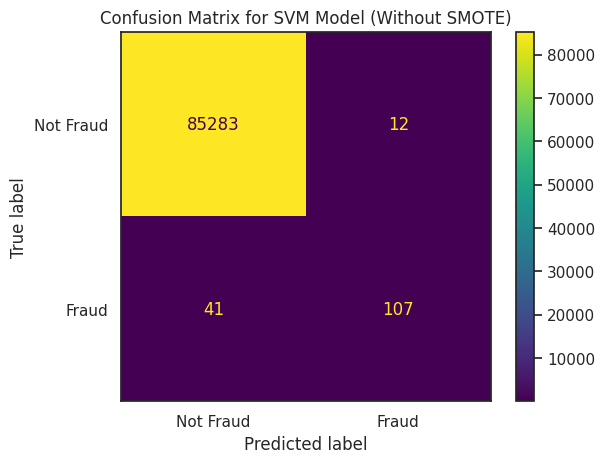

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, predictions_1, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud','Fraud'])
disp.plot()
plt.title('Confusion Matrix for SVM Model (Without SMOTE)')
plt.show()

In [ ]:
# balanced accuracy
bacc = balanced_accuracy_score(y_test, predictions_1)
print('Balance Accuracy:', bacc)

Balance Accuracy: 0.8614161423865979


In [ ]:
# precision, recall, and F-score

a2 = accuracy_score(y_test, predictions_1)
p2 = precision_score(y_test, predictions_1)
r2 = recall_score(y_test, predictions_1 )
f1_2 = fbeta_score(y_test, predictions_1, beta=1.0)

print('Accuracy without SMOTE:', a2)
print('Precision:', p2)
print('Recall:', r2)
print('F1-score:', f1_2)

Accuracy without SMOTE: 0.9993797034280163
Precision: 0.8991596638655462
Recall: 0.722972972972973
F1-score: 0.8014981273408239


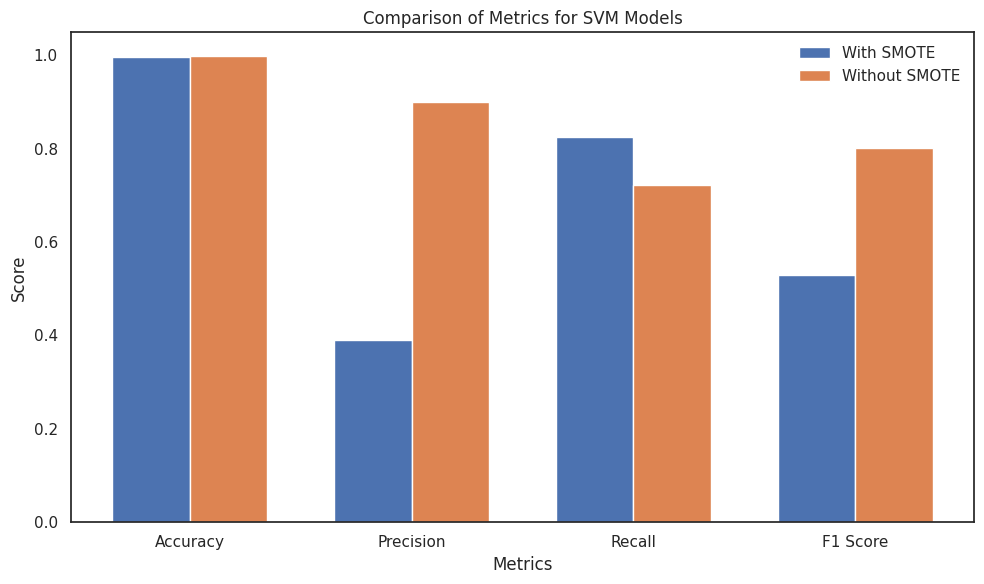

In [ ]:
#SVM Model with SMOTE
metrics_smote = {
    'Accuracy': a,
    'Precision': p,
    'Recall': r,
    'F1 Score': f1
}

#SVM Model without SMOTE
metrics_no_smote = {
    'Accuracy': a2,
    'Precision': p2,
    'Recall': r2,
    'F1 Score': f1_2
}

# Metric names & values
metrics_names = list(metrics_smote.keys())
metrics_values_smote = list(metrics_smote.values())
metrics_values_no_smote = list(metrics_no_smote.values())
num_metrics = len(metrics_names)

x = range(num_metrics)
bar_width = 0.35

#bar plot
plt.figure(figsize=(10, 6))
plt.bar(x, metrics_values_smote, width=bar_width, label='With SMOTE')
plt.bar([pos + bar_width for pos in x], metrics_values_no_smote, width=bar_width, label='Without SMOTE')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Metrics for SVM Models')
plt.xticks([pos + bar_width / 2 for pos in x], metrics_names)
plt.legend()

plt.tight_layout()
plt.show()

###Decision Tree With SMOTE

In [ ]:
#training Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(df_X_train_res, y_res)

print('Trained Decision Tree Model (With SMOTE):', dt_model)

#predictions
y_pred_dt = dt_model.predict(df_X_test)
print('Shape of Predictions:', y_pred_dt.shape)

#classification report
print('Classification Report:\n', classification_report(y_test, y_pred_dt))

Trained Decision Tree Model (With SMOTE): DecisionTreeClassifier(random_state=42)
Shape of Predictions: (85443,)
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.37      0.76      0.50       148

    accuracy                           1.00     85443
   macro avg       0.69      0.88      0.75     85443
weighted avg       1.00      1.00      1.00     85443



Performance Metrics

In [ ]:
#Accuracu, Precision, Recall, F1-Score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_score_dt = fbeta_score(y_test, y_pred_dt, beta=1.0)

print('Accuracy with SMOTE:', accuracy_dt)
print('Recall with SMOTE:', recall_dt)
print('Precision with SMOTE:', precision_dt)
print('F1 Score with SMOTE:', f1_score_dt)

Accuracy with SMOTE: 0.9973666654962958
Recall with SMOTE: 0.7567567567567568
Precision with SMOTE: 0.37209302325581395
F1 Score with SMOTE: 0.49888641425389757


Confusion matrix

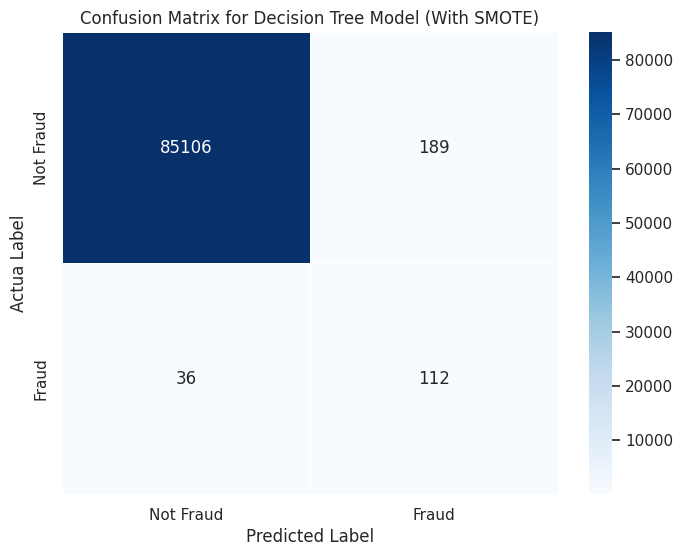

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", linewidths=.5, cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.ylabel('Actua Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision Tree Model (With SMOTE)')
plt.show()

###Decision Tree Without SMOTE

In [ ]:
#configuration and training DT model without SMOTE
dt_model_no_smote = DecisionTreeClassifier(random_state=42)
dt_model_no_smote.fit(X_train_norm, y_train)

print('Trained Decision Tree Model (without SMOTE):', dt_model_no_smote)

#Predictions without SMOTE
y_pred_dt_no_smote = dt_model_no_smote.predict(df_X_test)

#classification report
print('Classification Report (without SMOTE):\n', classification_report(y_test, y_pred_dt_no_smote))

Trained Decision Tree Model (without SMOTE): DecisionTreeClassifier(random_state=42)
Classification Report (without SMOTE):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.80      0.75      0.78       148

    accuracy                           1.00     85443
   macro avg       0.90      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Performance Metrics

In [ ]:
# Accuracy, Precision, Recall, and F1-Score without SMOTE
accuracy_dt_no_smote = accuracy_score(y_test, y_pred_dt_no_smote)
precision_dt_no_smote = precision_score(y_test, y_pred_dt_no_smote)
recall_dt_no_smote = recall_score(y_test, y_pred_dt_no_smote)
f1_score_dt_no_smote = f1_score(y_test, y_pred_dt_no_smote)

print('Accuracy of the Model (without SMOTE):', accuracy_dt_no_smote)
print('Recall (without SMOTE):', recall_dt_no_smote)
print('Precision (without SMOTE):', precision_dt_no_smote)
print('F1 Score (without SMOTE):', f1_score_dt_no_smote)


Accuracy of the Model (without SMOTE): 0.9992509626300574
Recall (without SMOTE): 0.75
Precision (without SMOTE): 0.8043478260869565
F1 Score (without SMOTE): 0.7762237762237763


Confusion Matrix without SMOTE

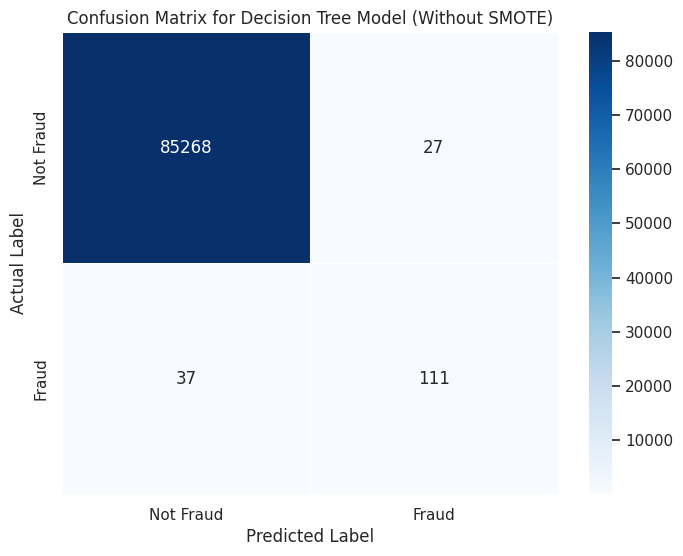

In [ ]:
cm_dt_no_smote = confusion_matrix(y_test, y_pred_dt_no_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_no_smote, annot=True, fmt="d", linewidths=.5, cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision Tree Model (Without SMOTE)')
plt.show()

Comaprision of Performance Metrics of Decision Tree With & Without SMOTE

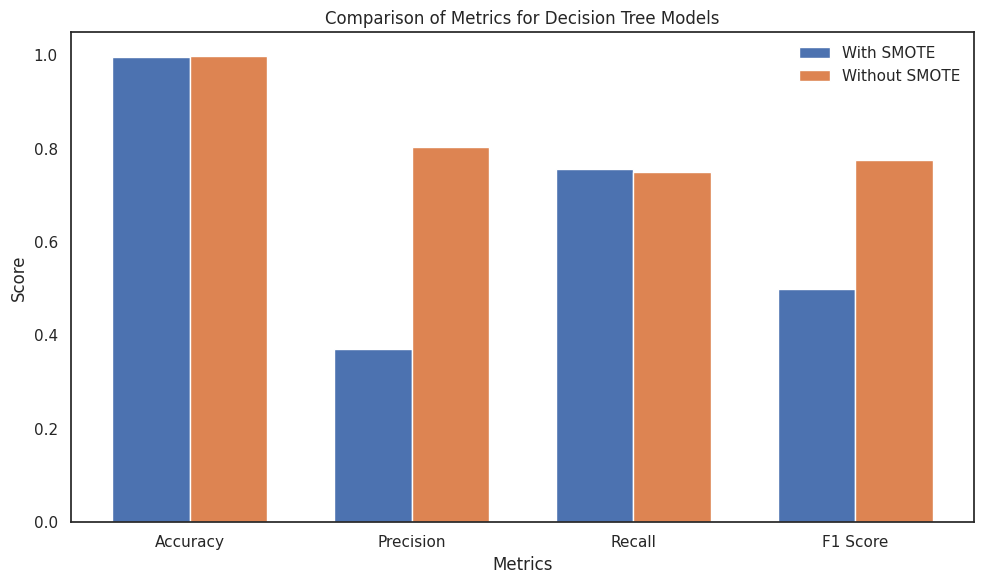

In [ ]:
#Decision Tree Model with SMOTE
metrics_smote = {
    'Accuracy': accuracy_dt,
    'Precision': precision_dt,
    'Recall': recall_dt,
    'F1 Score': f1_score_dt
}

#Decision Tree Model without SMOTE
metrics_no_smote = {
    'Accuracy': accuracy_dt_no_smote,
    'Precision': precision_dt_no_smote,
    'Recall': recall_dt_no_smote,
    'F1 Score': f1_score_dt_no_smote
}

# Metric names & values
metrics_names = list(metrics_smote.keys())
metrics_values_smote = list(metrics_smote.values())
metrics_values_no_smote = list(metrics_no_smote.values())
num_metrics = len(metrics_names)

x = range(num_metrics)
bar_width = 0.35

#bar plot
plt.figure(figsize=(10, 6))
plt.bar(x, metrics_values_smote, width=bar_width, label='With SMOTE')
plt.bar([pos + bar_width for pos in x], metrics_values_no_smote, width=bar_width, label='Without SMOTE')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Metrics for Decision Tree Models')
plt.xticks([pos + bar_width / 2 for pos in x], metrics_names)
plt.legend()

plt.tight_layout()
plt.show()

Comaprision of Confusion Matrics of Decision Tree With & Without SMOTE

###Logistic Regression without SMOTE.

Accuracy: 0.99916903666772
Precision: 0.8666666666666667
Recall: 0.6148648648648649
F1 Score: 0.7193675889328064
Confusion Matrix:
 [[85281    14]
 [   57    91]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.61      0.72       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



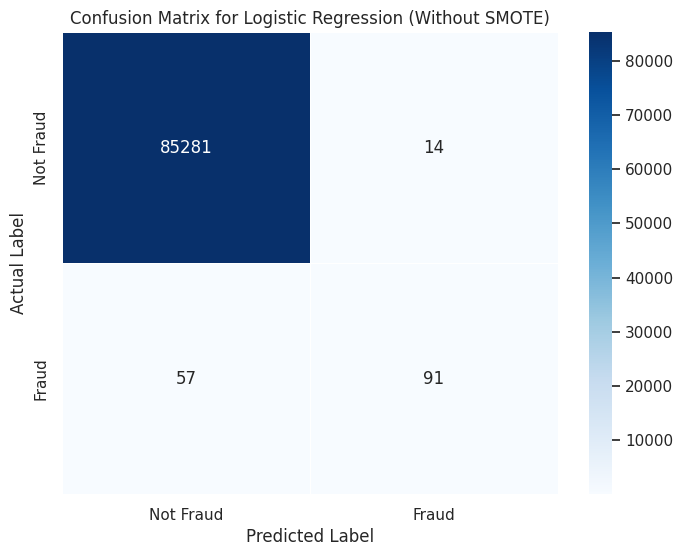

In [ ]:
# Initializing the logistic regression model
log_reg_model = LogisticRegression(max_iter=1000)

# Training the model
log_reg_model.fit(df_X_train, y_train)

# Making predictions on the testing set
y_pred = log_reg_model.predict(df_X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Logistic Regression (Without SMOTE)')
plt.show()

###Logistic Regression with SMOTE

Logistic Regression Model with SMOTE:
Accuracy: 0.9759137670727853
Precision: 0.06152433425160698
Recall: 0.9054054054054054
F1 Score: 0.11521926053310405
Confusion Matrix:
 [[83251  2044]
 [   14   134]]


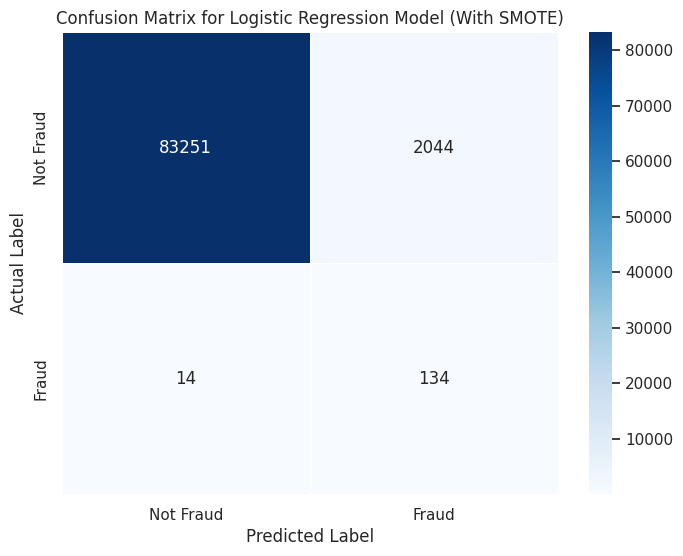

In [ ]:

# LR with SMOTE
lr_model_smote = LogisticRegression(random_state=42)
lr_model_smote.fit(df_X_train_res, y_res)

#predictions
y_pred_lr_smote = lr_model_smote.predict(df_X_test)

#performance with SMOTE
accuracy_lr_smote = accuracy_score(y_test, y_pred_lr_smote)
precision_lr_smote = precision_score(y_test, y_pred_lr_smote)
recall_lr_smote = recall_score(y_test, y_pred_lr_smote)
f1_score_lr_smote = fbeta_score(y_test, y_pred_lr_smote, beta=1.0)

#consusion matrix
cm_lr_smote = confusion_matrix(y_test, y_pred_lr_smote)

print("Logistic Regression Model with SMOTE:")
print("Accuracy:", accuracy_lr_smote)
print("Precision:", precision_lr_smote)
print("Recall:", recall_lr_smote)
print("F1 Score:", f1_score_lr_smote)
print("Confusion Matrix:\n", cm_lr_smote)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr_smote, annot=True, fmt="d", linewidths=.5, cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Logistic Regression Model (With SMOTE)')
plt.show()

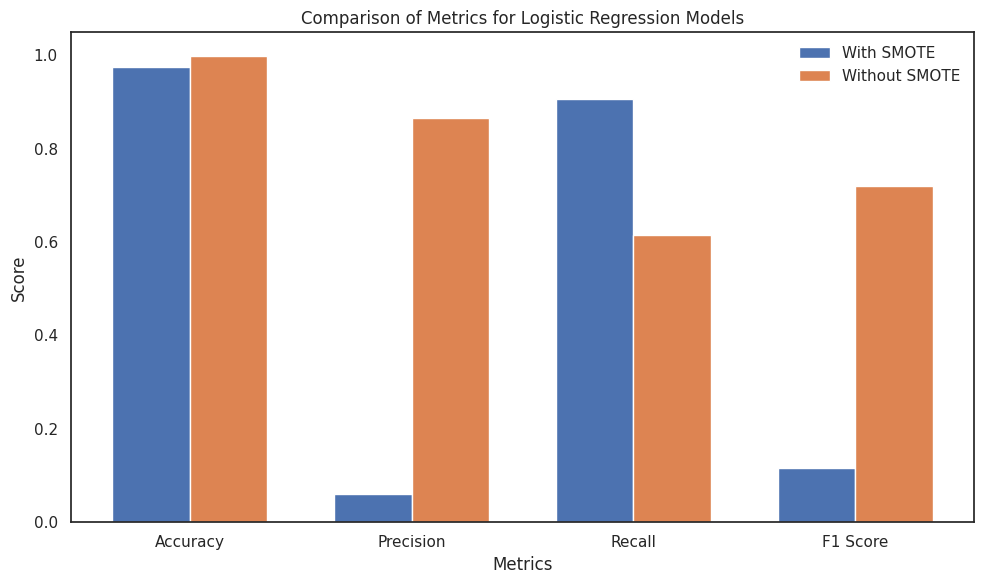

In [ ]:
# Metrics for Logistic Regression without SMOTE
metrics_no_smote = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Metrics for Logistic Regression with SMOTE
metrics_smote = {
    'Accuracy': accuracy_lr_smote,
    'Precision': precision_lr_smote,
    'Recall': recall_lr_smote,
    'F1 Score': f1_score_lr_smote
}

# Metric names & values
metrics_names = list(metrics_smote.keys())
metrics_values_smote = list(metrics_smote.values())
metrics_values_no_smote = list(metrics_no_smote.values())
num_metrics = len(metrics_names)

x = range(num_metrics)
bar_width = 0.35

# Bar plot setup
plt.figure(figsize=(10, 6))
plt.bar(x, metrics_values_smote, width=bar_width, label='With SMOTE')
plt.bar([pos + bar_width for pos in x], metrics_values_no_smote, width=bar_width, label='Without SMOTE')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Metrics for Logistic Regression Models')
plt.xticks([pos + bar_width / 2 for pos in x], metrics_names)
plt.legend()

plt.tight_layout()
plt.show()


### KNN With SMOTE

KNN Model with SMOTE:
Accuracy: 0.9983614807532507
Precision: 0.5169491525423728
Recall: 0.8243243243243243
F1 Score: 0.6354166666666666
Confusion Matrix:
 [[85181   114]
 [   26   122]]


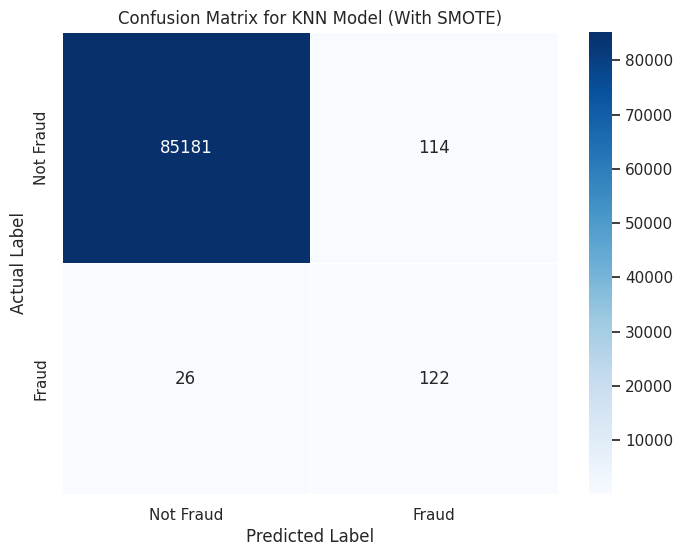

In [ ]:
# KNN with SMOTE

knn_model_smote = KNeighborsClassifier(n_neighbors=5)
knn_model_smote.fit(df_X_train_res, y_res)

# Predictions
y_pred_knn_smote = knn_model_smote.predict(df_X_test)

#Accuracy, Precision, Recall, F1-Score without SMOTE
accuracy_knn_smote = accuracy_score(y_test, y_pred_knn_smote)
precision_knn_smote = precision_score(y_test, y_pred_knn_smote)
recall_knn_smote = recall_score(y_test, y_pred_knn_smote)
f1_score_knn_smote = fbeta_score(y_test, y_pred_knn_smote, beta=1.0)

#Confusion Matrix without SMOTE
cm_knn_smote = confusion_matrix(y_test, y_pred_knn_smote)

print("KNN Model with SMOTE:")
print("Accuracy:", accuracy_knn_smote)
print("Precision:", precision_knn_smote)
print("Recall:", recall_knn_smote)
print("F1 Score:", f1_score_knn_smote)
print("Confusion Matrix:\n", cm_knn_smote)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_smote, annot=True, fmt="d", linewidths=.5, cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for KNN Model (With SMOTE)')
plt.show()

### KNN Without SMOTE

KNN Model without SMOTE:
Accuracy: 0.9994616293903538
Precision: 0.9473684210526315
Recall: 0.7297297297297297
F1 Score: 0.8244274809160306
Confusion Matrix:
 [[85289     6]
 [   40   108]]


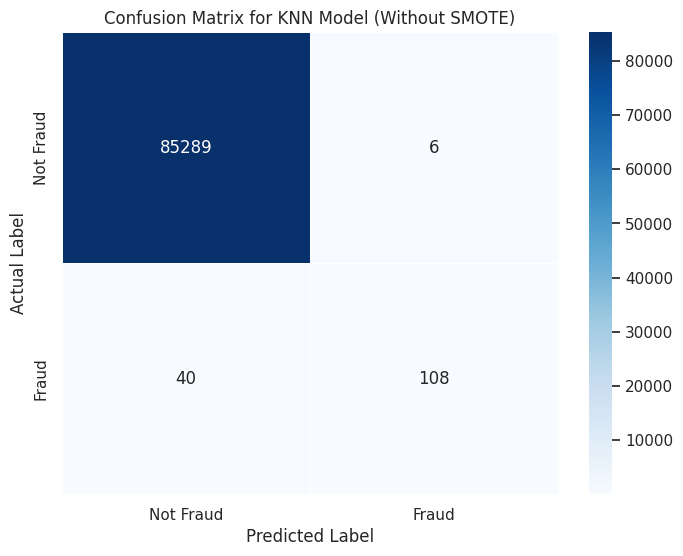

In [ ]:
#KNN without SMOTE
knn_model_no_smote = KNeighborsClassifier(n_neighbors=5)
knn_model_no_smote.fit(df_X_train, y_train)

#Predictions
y_pred_knn_no_smote = knn_model_no_smote.predict(df_X_test)

#Accuracy, Precision, Recall, F1-Score
accuracy_knn_no_smote = accuracy_score(y_test, y_pred_knn_no_smote)
precision_knn_no_smote = precision_score(y_test, y_pred_knn_no_smote)
recall_knn_no_smote = recall_score(y_test, y_pred_knn_no_smote)
f1_score_knn_no_smote = fbeta_score(y_test, y_pred_knn_no_smote, beta=1.0)

# Confusion Matrix
cm_knn_no_smote = confusion_matrix(y_test, y_pred_knn_no_smote)

print("KNN Model without SMOTE:")
print("Accuracy:", accuracy_knn_no_smote)
print("Precision:", precision_knn_no_smote)
print("Recall:", recall_knn_no_smote)
print("F1 Score:", f1_score_knn_no_smote)
print("Confusion Matrix:\n", cm_knn_no_smote)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_no_smote, annot=True, fmt="d", linewidths=.5, cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for KNN Model (Without SMOTE)')
plt.show()

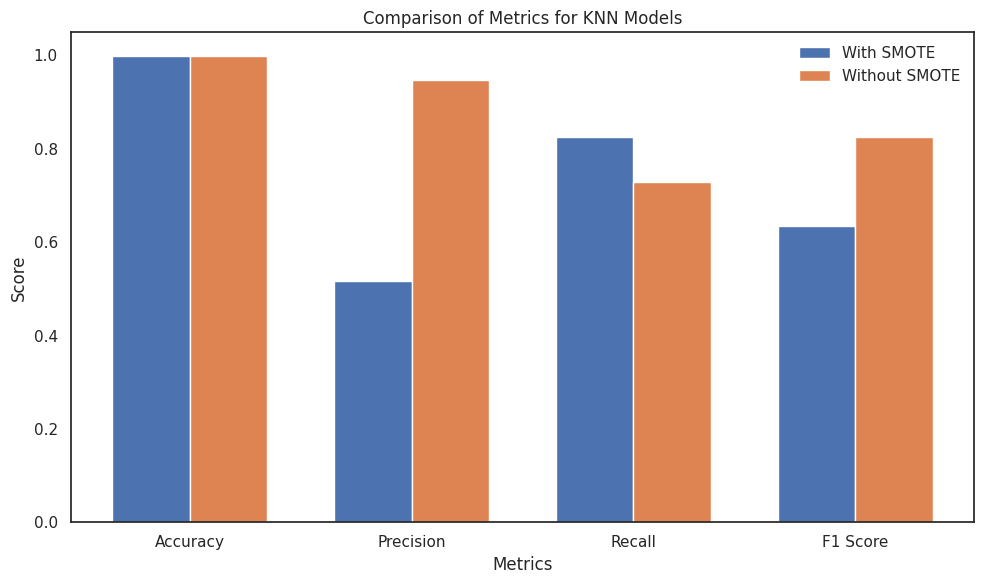

In [ ]:
# Metrics for KNN without SMOTE
metrics_no_smote = {
    'Accuracy': accuracy_knn_no_smote,
    'Precision': precision_knn_no_smote,
    'Recall': recall_knn_no_smote,
    'F1 Score': f1_score_knn_no_smote
}

# Metrics for KNN with SMOTE
metrics_smote = {
    'Accuracy': accuracy_knn_smote,
    'Precision': precision_knn_smote,
    'Recall': recall_knn_smote,
    'F1 Score': f1_score_knn_smote
}

# Metric names & values
metrics_names = list(metrics_smote.keys())
metrics_values_smote = list(metrics_smote.values())
metrics_values_no_smote = list(metrics_no_smote.values())
num_metrics = len(metrics_names)

x = range(num_metrics)
bar_width = 0.35

# Bar plot setup
plt.figure(figsize=(10, 6))
plt.bar(x, metrics_values_smote, width=bar_width, label='With SMOTE')
plt.bar([pos + bar_width for pos in x], metrics_values_no_smote, width=bar_width, label='Without SMOTE')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Metrics for KNN Models')
plt.xticks([pos + bar_width / 2 for pos in x], metrics_names)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
data = {
    'Model': [
        'SVM (with SMOTE)', 'SVM (without SMOTE)',
        'Decision Tree (with SMOTE)', 'Decision Tree (without SMOTE)',
        'Logistic Regression (with SMOTE)', 'Logistic Regression (without SMOTE)',
        'KNN (with SMOTE)', 'KNN (without SMOTE)'
    ],
    'Accuracy': [
        a, a2,
        accuracy_dt, accuracy_dt_no_smote,
        accuracy_lr_smote, accuracy,
        accuracy_knn_smote, accuracy_knn_no_smote
    ],
    'Precision': [
        p, p2,
        precision_dt, precision_dt_no_smote,
        precision_lr_smote, precision,
        precision_knn_smote, precision_knn_no_smote
    ],
    'Recall': [
        r, r2,
        recall_dt, recall_dt_no_smote,
        recall_lr_smote, recall,
        recall_knn_smote, recall_knn_no_smote
    ],
    'F1 Score': [
        f1, f1_2,
        f1_score_dt, f1_score_dt_no_smote,
        f1_score_lr_smote, f1,
        f1_score_knn_smote, f1_score_knn_no_smote
    ]
}

#DataFrame
df_metrics = pd.DataFrame(data)
df_metrics.set_index('Model', inplace=True)
print(df_metrics)

                                     Accuracy  Precision    Recall  F1 Score
Model                                                                       
SVM (with SMOTE)                     0.997460   0.389776  0.824324  0.719368
SVM (without SMOTE)                  0.999380   0.899160  0.722973  0.801498
Decision Tree (with SMOTE)           0.997367   0.372093  0.756757  0.498886
Decision Tree (without SMOTE)        0.999251   0.804348  0.750000  0.776224
Logistic Regression (with SMOTE)     0.975914   0.061524  0.905405  0.115219
Logistic Regression (without SMOTE)  0.999169   0.866667  0.614865  0.719368
KNN (with SMOTE)                     0.998361   0.516949  0.824324  0.635417
KNN (without SMOTE)                  0.999462   0.947368  0.729730  0.824427


##Backtracking poor fit of models with SMOTE

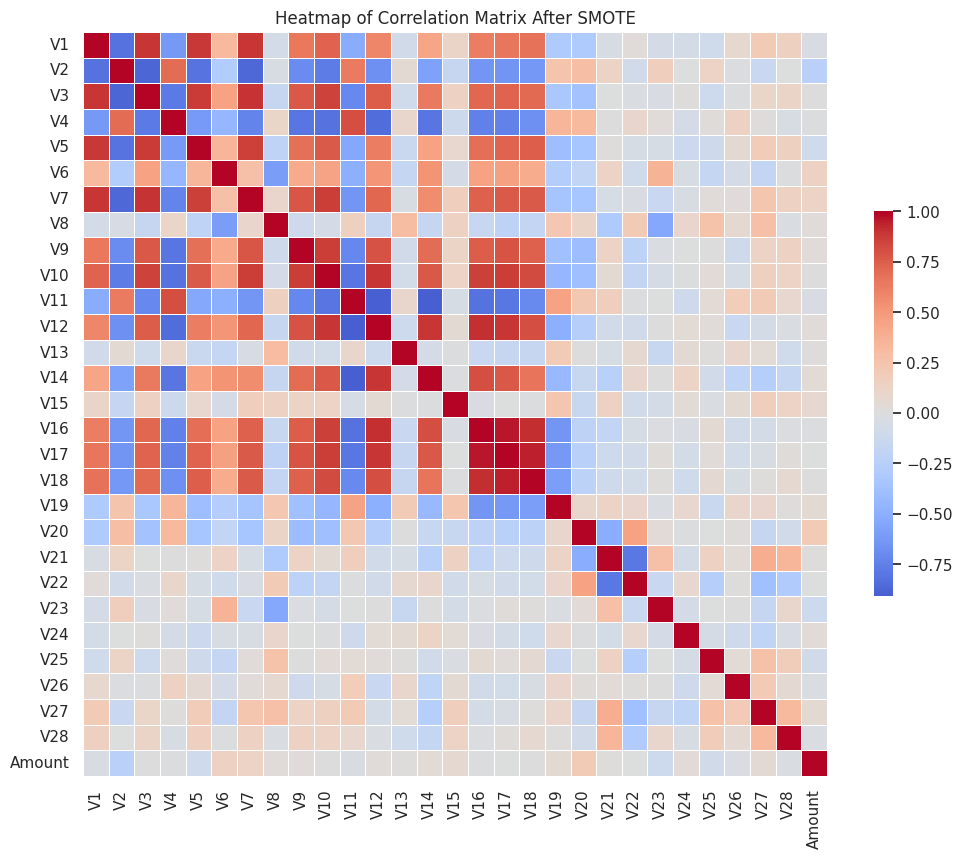

In [ ]:
corr_resampled = df_X_train_res.corr()
sns.set(style="white")
plt.figure(figsize=(12, 10))

#heatmap
sns.heatmap(corr_resampled, cmap="coolwarm", center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap of Correlation Matrix After SMOTE')
plt.show()

Reason for Colinearity


*  The use of SMOTE to the dataset, composed of PCA-derived variables (V1 to V28), led to an unexpected increase in collinearity among these typically orthogonal features. The results from SMOTE’s method of generating synthetic data by interpolating between existing minority class samples, inadvertently reinforced minor correlations that originally existed.

*  The heightened collinearity undermines the statistical independence intended by PCA, leading to models perform poorly on new data due to overfitting to the synthetic characteristics.





## Models Comparision

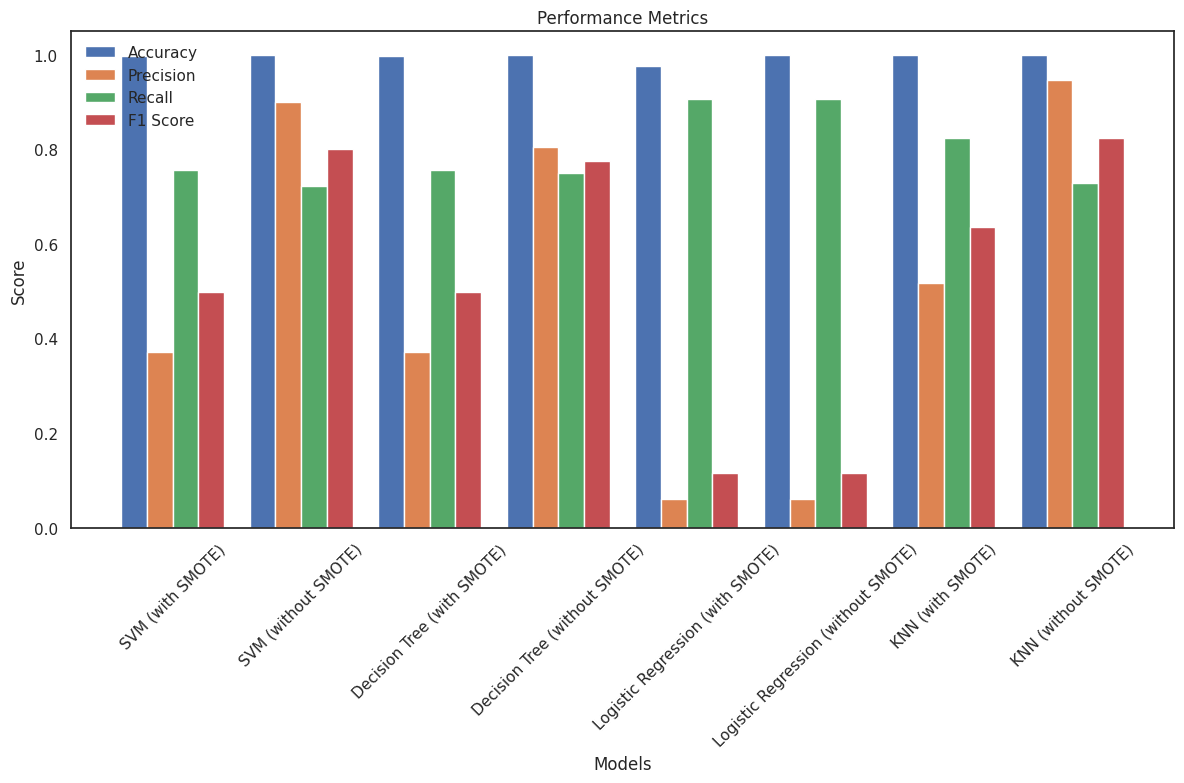

In [ ]:
models = ['SVM (with SMOTE)', 'SVM (without SMOTE)', 'Decision Tree (with SMOTE)', 'Decision Tree (without SMOTE)', 'Logistic Regression (with SMOTE)', 'Logistic Regression (without SMOTE)', 'KNN (with SMOTE)', 'KNN (without SMOTE)']
accuracy = [accuracy_dt, a2, accuracy_dt, accuracy_dt_no_smote, accuracy_lr_smote, accuracy, accuracy_knn_smote, accuracy_knn_no_smote]
precision = [precision_dt, p2, precision_dt, precision_dt_no_smote, precision_lr_smote, precision_lr_smote, precision_knn_smote, precision_knn_no_smote]
recall = [recall_dt, r2, recall_dt, recall_dt_no_smote, recall_lr_smote, recall_lr_smote, recall_knn_smote, recall_knn_no_smote]
f1_score = [f1_score_dt, f1_2, f1_score_dt, f1_score_dt_no_smote, f1_score_lr_smote, f1_score_lr_smote, f1_score_knn_smote, f1_score_knn_no_smote]

fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.2
index = range(len(models))

plt.bar(index, accuracy, bar_width, label='Accuracy')
plt.bar([i + bar_width for i in index], precision, bar_width, label='Precision')
plt.bar([i + 2 * bar_width for i in index], recall, bar_width, label='Recall')
plt.bar([i + 3 * bar_width for i in index], f1_score, bar_width, label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.xticks([i + 1.5 * bar_width for i in index], models, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()